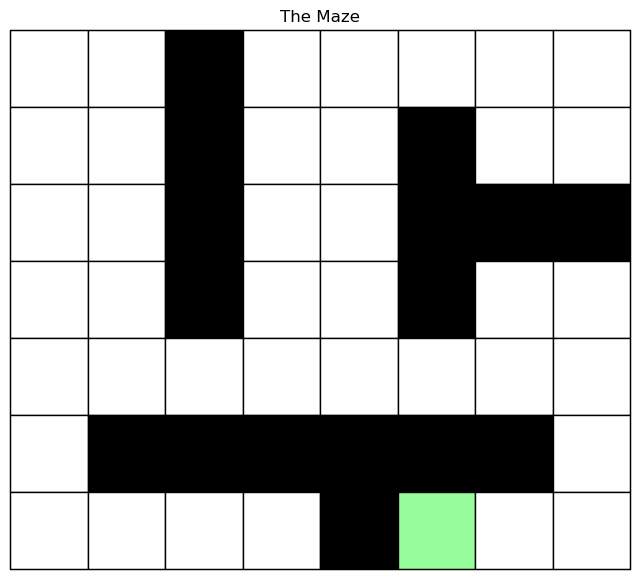

In [14]:
import numpy as np
import maze as mz
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0],
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze
mz.draw_maze(maze)

env = mz.Maze(maze)
# env.show()

## Basic Maze

#### a) MDP formulation

We propose the following MDP formulation: 

##### State space $\mathcal{S}$
We model the state space as the set of all possible positions of the player and all possible positions of the Minotaur in the maze. Formally, the state space is

$$\mathcal{S} = \big\lbrace (i,j,x,y):\textrm{such that the cell
} (i,j) \textrm{ is the position of the player and not an obstacle}, \\   (x,y) \textrm { is the position of the Minotaur}\big\rbrace.$$

##### Action space $\mathcal{A}$
We allow the player to chose to either move `left`, `right`, `down`, `up` or not move at all (`stay`). Note that sometimes the player cannot move in a certain direction because of an obstacle or a wall, yet we permit this to be action. We will see that this is not an issue as long as we define our transition probabilities and rewards appropriately.
Formally, the action space is

$$\mathcal{A} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace.$$

##### Transition probabilities $\mathcal{P}$
Note that there is no randomness involved upon taking an action by the player. As a consequence, the transition probabilities are deterministic. More precisely, 
Only the player's next state is decided by the action deterministically. The action of the Minotaur is random and the transition probability is related to the position where the Minotaur is. 
- If at state (or position) $s$, the position of the Minotaur is in the middle of the map, then $\mathbb{P}(s' \vert s, a) = \frac{1}{4}$. 
- If at state (or position)  $s$ , the position of the Minotaur is in the borders of the map (not in the corners), then $\mathbb{P}(s' \vert s, a) = \frac{1}{3}$.
- If at state (or position)  $s$ , the position of the Minotaur is in the corners of the map, then $\mathbb{P}(s' \vert s, a) = \frac{1}{2}$.


##### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles.    
   - If at state $s$, taking action $a$, leads to a wall or an obstacle then $r(s,a) = -\infty$
   - If at state $s$, taking action $a$, leads to caught by the Minotaur then $r(s,a) = -\infty$
   - If at state $s$, taking action $a$, leads to some other position in the maze that is not the exit nor a wall nor an obstacle, then $r(s, a) = -1$. 
   - If at state $s$, taking action $a$, leads to the exit then $r(s ,a) = 0$. 
  

#### b) Moving in alternating rounds
The MDP model should be the same. But during the simulation step, there might be a higher probability for the player caught by the Minotaur if they move in alternating round. 
We can consider such a scenario as showed below. And the player chooses to move left and the Minotaur moves to the right. If they move at the same time, the player could survive as the game rule. But if they move in alternating rounds, the player would be caught for whether the player moving firstly or the Minotaur moving firstly.
![scenario](./scenario.png)

## Dynamic Programming

#### c) Solve the problem: find a policy that maximizes the probability of leaving the maze alive (in the shortest time possible) for T = 20. Illustrate this policy.

 The policy is solved as below. And the policy is a function related to the states and the time t. Such a function mapping can be illustrated as printed.

In [12]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);
np.set_printoptions(threshold=np.inf);

# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0,6,5);
path, _ = env.simulate(start, policy, method);
print(path)

[(0, 0, 6, 5), (0, 1, 5, 5), (1, 1, 4, 5), (2, 1, 4, 4), (3, 1, 3, 4), (4, 1, 3, 5), (4, 2, 3, 4), (4, 3, 3, 5), (4, 4, 3, 4), (4, 5, 3, 3), (4, 6, 3, 2), (4, 7, 4, 2), (5, 7, 4, 3), (6, 7, 4, 2), (6, 6, 4, 1), (6, 5, 5, 1), (6, 5, 5, 0), (6, 5, 6, 0), (6, 5, 5, 0), (6, 5, 5, 1), (6, 5, 6, 1)]


KeyboardInterrupt: 

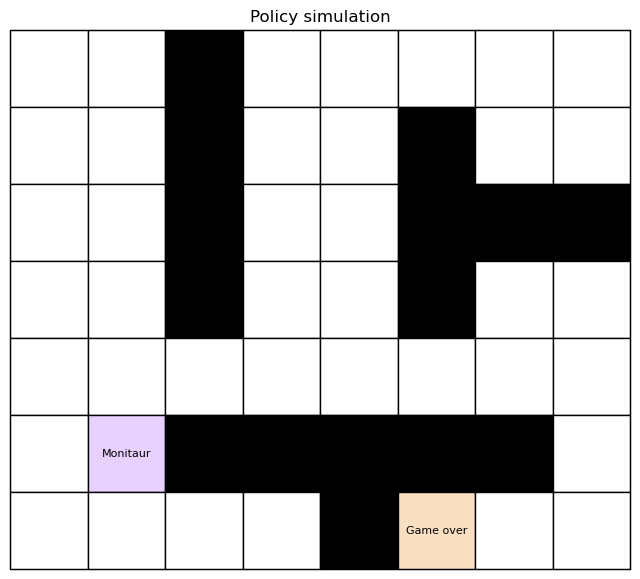

In [13]:
# Show the shortest path 
mz.animate_solution(maze, path)

 #### d)For T = 1,..., 30 compute a policy that maximizes the probability of exiting the maze alive (in the shortest time possible) and plot the probability. Is there a difference if the minotaur is allowed to stand still? If so, why?
 The probability would drop a bit if the Minotaur is allowed to stand still. Because the action space of the Minotaur is more complex and more unpredictable. Thus, it is harder to make an optimal decision to help the player exit the maze.

In [ ]:
import matplotlib.pyplot as pyplt

N = 1000;
T = 31;
rate = [];
for t in range(1, T):
    success_cnt = 0;
    horizon = t;
    # Solve the MDP problem with dynamic programming 
    V, policy= mz.dynamic_programming(env,horizon);
    for i in range(0, N):
        method = 'DynProg';
        start  = (0, 0, 6, 5);
        path, flag= env.simulate(start, policy, method);
        if flag:
            success_cnt = success_cnt + 1;
    success_rate = success_cnt/N;
    rate.append(success_rate);

pyplt.plot(rate);

In [ ]:
import matplotlib.pyplot as pyplt

env = mz.Maze(maze, Stay=True) # monitaur can be still

N = 1000;
T = 31;
rate = [];
for t in range(1, T):
    success_cnt = 0;
    horizon = t;
    # Solve the MDP problem with dynamic programming 
    V, policy= mz.dynamic_programming(env,horizon);
    for i in range(0, N):
        method = 'DynProg';
        start  = (0, 0, 6, 5);
        path, flag= env.simulate(start, policy, method);
        if flag:
            success_cnt = success_cnt + 1;
    success_rate = success_cnt/N;
    rate.append(success_rate);

pyplt.plot(rate);

#### e) The state "game over by poison" should be added to state space. And adding another reward of POISON_REWARD = -100.
The probability of transition will change because of new additional state. The action space and remain the same.
$$Alive: \\
r'(s,a) = r(s,a) \\ p'(s'|s,a) = \frac{29}{30} p(s'|s,a) \\
Dead: \\ r'(s,a) = -100 \\ p'(s'|s,a) = \frac{1}{30}
$$

In [15]:
# Discount Factor 
gamma   = 0.95; 
# Accuracy threshold 
epsilon = 0.0001;
V, policy = mz.value_iteration(env, gamma, epsilon, poison_mode=True)

1540.385167316568
1460.8146129704185
1342.1125261416737
1231.7380159711113
1129.6956819743918
1036.0555282853393
950.7468843979738
872.0334041119271
799.2982484029862
732.5580580395865
671.0322430955216
614.2545110038751
562.4453533442352
514.8329880771142
471.58191377953085
432.5765568486658
397.1658525893629
364.730641294565
334.9443055888421
307.5905206324195
282.4706281141053
259.40219348478706
238.2176810168625
218.76323706715198
200.89757270666797
184.49093760229
169.4241776981035
155.5878698527585
142.88152714811574
131.21286909768668
120.49715145470901
110.65655075257432
101.61959910778047
93.32066518064502
85.69947752422584
78.70068685974726
72.27346409953522
66.37113119807287
60.95082215023032
55.97317167462802
51.402029321200104
47.20419692663519
43.34918751096004
39.80900386423183
36.55793521531979
33.572370506068346
30.830626914739582
28.31279238336932
26.00058100539374
23.87720022328667
21.927228871718572
20.136505180528264
18.492023924118048
16.981841970315042
15.5949915

In [16]:
method = 'ValIter';
start  = (0,0,6,5);
path, _ = env.simulate(start, policy, method)
print(path)

[(0, 0, 6, 5), (0, 1, 5, 5), (1, 1, 4, 5), (2, 1, 3, 5), (3, 1, 2, 5), (4, 1, 1, 5), (4, 2, 0, 5), (4, 3, 0, 6), (4, 4, 1, 6), (4, 5, 1, 5), (4, 6, 1, 6), (4, 7, 1, 5), (5, 7, 1, 4), (6, 7, 1, 5), (6, 6, 2, 5), (6, 5, 3, 5), (6, 5, 3, 4)]


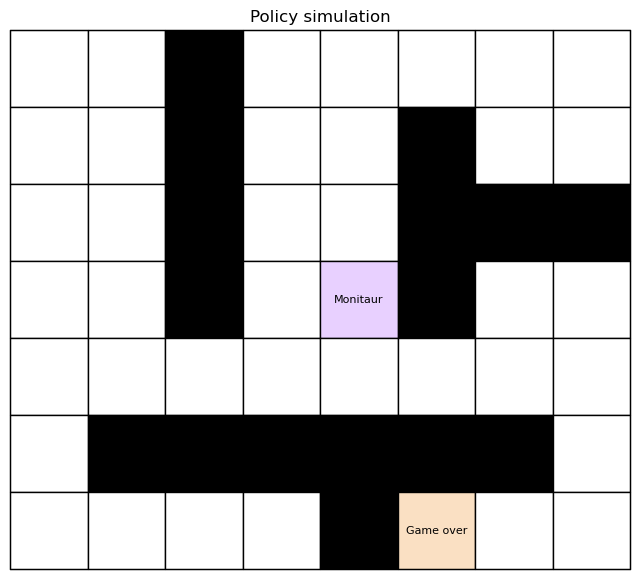

In [17]:
# Show the shortest path 
mz.animate_solution(maze, path)

#### (f)Estimate the probability of getting out alive using this policy by simulating 10000 games.

In [18]:
N = 10000;
success_cnt = 0;
for i in range(0,N):
    path, flag = env.simulate(start, policy, method);
    if flag:
        success_cnt = success_cnt + 1;
success_rate  = success_cnt/N;
print(success_rate)
        

0.5461


## Additional Questions
#### g) Theoretical questions:
##### 1)What does it mean that a learning method is on-policy or off-policy?

Observations in on-policy is generated under the policy $\pi_k$. Through iterations, $\pi_k$ will converge to the optimal policy.
Off-policy obtain observations from a certain policy $\pi_b$. It learns from the historical data.

##### 2)State the convergence conditions for Q-learning and SARSA.
  
The convergence condition for Q-learning is showed belowed,
  the learning rate,$\alpha_t$should satisfy
    $\sum_{t=0}^{\infty}\alpha_t=\infty$ and $\sum_{t=0}^{\infty}\alpha_t^2 < \infty$,
    and the behaviour exploring the state and action space enough.
  
SARSA cannot converge to a optimal policy, but when t is large enough, $\pi_t$ could be regarded as the optimal policy approximately.
